In [9]:
!pip install torch==2.3.1+cu121 torchvision==0.18.1+cu121 torchaudio==2.3.1+cu121 --index-url https://download.pytorch.org/whl/cu121
!pip install transformers==4.41.2
!pip install pillow
!pip install matplotlib
!pip install requests
!pip install numpy==1.26.4


Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 780.9/780.9 MB 175.2 MB/s eta 0:00:01
ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 112.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2

In [3]:
from transformers import YolosImageProcessor, YolosForObjectDetection
import torch
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [1]:
import torch, transformers, numpy
print("Torch:", torch.__version__)
print("Transformers:", transformers.__version__)
print("NumPy:", numpy.__version__)


Torch: 2.8.0+cu126
Transformers: 4.41.2
NumPy: 1.26.4


In [6]:
model_name = "valentinafeve/yolos-fashionpedia"
processor = YolosImageProcessor.from_pretrained(model_name)
model = YolosForObjectDetection.from_pretrained(model_name)

image_path = "Imagem.jpeg"  # coloque o caminho da sua imagem
image = Image.open(image_path).convert("RGB")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes)[0]

draw = ImageDraw.Draw(image)
hat_detected = False

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    if score > 0.7:  # confiança mínima
        label_name = model.config.id2label[label.item()]
        if label_name.lower() == "hat":  # verifica se é chapéu
            hat_detected = True
            box = [round(i, 2) for i in box.tolist()]
            draw.rectangle(box, outline="red", width=2)
            draw.text((box[0], box[1]), f"{label_name} ({score:.2f})", fill="red")

if hat_detected:
    print("A pessoa está usando chapéu.")
else:
    print("A pessoa NÃO está usando chapéu.")

# resultado
image.show()
image.save("resultado_yolos_hat.png")

A pessoa NÃO está usando chapéu.


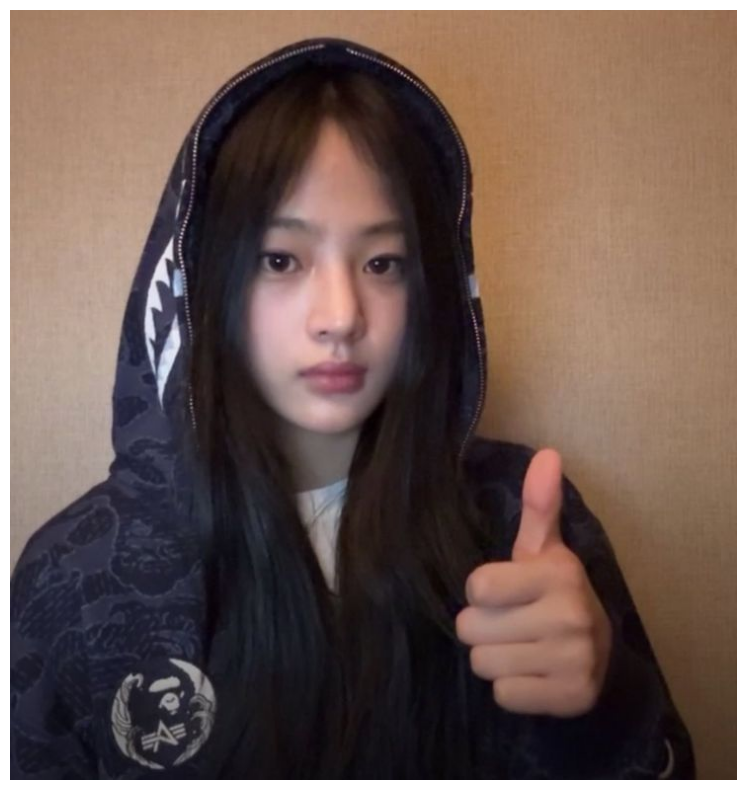

In [7]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()